In [1]:
import sys 
sys.path.append('../src') 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# import torch

import KPCA
from utils import get_data, calc_energy

import create_modes as cm
import sindy_optuna as so
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler

c:\Users\fabio\anaconda3\envs\reduction_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Simulações relevantes:

#### Cavidade

- Low $\theta$: 
  - Wi = 5, Re = 100, $\beta$ = 0.5
  - Wi = 5, Re = 10, $\beta$ = 0.5
- High $\theta$:
  - Wi = 5, Re = 0.01, $\beta$ = 0.5
  - Wi = 0.5, Re = 0.001, $\beta$ = 0.5

In [2]:
# Dry run - create data

Res =   [100, 10 , 0.01, 0.001]
betas = [0.5, 0.5, 0.5 , 0.5]
Wis =   [5  , 5  , 5   , 0.5]


In [3]:

for Re,beta,Wi in zip(Res,betas, Wis):
    theta = (1.0-beta)/(Re*Wi)
    print(theta)
    cm.save_modes_cavity(Re,Wi,beta,'linear',n_modes=4)
    cm.save_modes_cavity(Re,Wi,beta,'oldroyd',n_modes=4)

0.001
0.01
10.0
1000.0


In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Description of your program')
parser.add_argument('--param1', type=str, help='Description of param1')
parser.add_argument('--param2', type=int, default=10, help='Description of param2')
parser.add_argument('--param3', type=float, default=0.5, help='Description of param3')

args = parser.parse_args()

In [ ]:
for Re,beta,Wi in zip(Res,betas, Wis):
    theta = (1.0-beta)/(Re*Wi)
    print(theta)
    so.optimize(Re,Wi,beta,'linear',n_modes_file=4, n_modes_model=2)
    so.optimize(Re,Wi,beta,'oldroyd',n_modes_file=4, n_modes_model=2)

0.001


c:\Users\fabio\anaconda3\envs\reduction_env\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``constraints_func`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2026-01-15 15:49:30,979] A new study created in RDB with name: optuna_cavity_oldroyd_Re_100_Wi_5_beta_0.5_kernel_linear_nmodes_2
[I 2026-01-15 15:49:34,081] Trial 0 finished with value: 3812.274335962974 and parameters: {'relax_coeff_nu': 0.00017670169402947956, 'reg_weight_lam': 0.6351221010640696}. Best is trial 0 with value: 3812.274335962974.
[I 2026-01-15 15:49:45,735] Trial 1 finished with value: 6.303965047740528e+56 and parameters: {'relax_coeff_nu': 0.02465832945854911, 'reg_weight_lam': 0.024810409748678097}. Best is trial 0 with value: 3812.274335962974.
[I 2026-01-15 15:49:48,347] Trial 2 finished with value: 323.4599879390419 and parameters: {'relax_coeff_nu': 8.63200816860254e-06, 'reg_weight_lam': 0.0004207053950287938}. Best is trial 2 with valu

In [ ]:
for Re,beta,Wi in zip(Res,betas, Wis):
    theta = (1.0-beta)/(Re*Wi)
    print(theta)
    so.optimize(Re,Wi,beta,'linear',n_modes_file=4, n_modes_model=3)
    so.optimize(Re,Wi,beta,'oldroyd',n_modes_file=4, n_modes_model=3)

0.001


c:\Users\fabio\anaconda3\envs\reduction_env\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``constraints_func`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2026-01-15 15:48:20,981] Using an existing study with name 'optuna_cavity_oldroyd_Re_100_Wi_5_beta_0.5_kernel_linear_nmodes_3' instead of creating a new one.
c:\Users\fabio\anaconda3\envs\reduction_env\Lib\site-packages\pysindy\optimizers\sr3.py:374: ConvergenceWarning: SR3 did not converge after 1940 iterations.
  warnings.warn(


In [ ]:
## Read Optuna tests

params_linear = []
mse_linear = []

params_oldroyd = []
mse_oldroyd = []

labels = []

storage_name = "sqlite:///runs/{}.db"
sampler = TPESampler(seed=42)
pruner = MedianPruner()
for Re,beta,Wi in zip(Res,betas, Wis):
    theta = (1-beta)/(Re*Wi)
    labels.append(f'$Re$={Re:g}, $Wi$={Wi:g}\n$\\beta$={beta:g}, $\\theta$={theta:g}')
    exp_id_linear = f'optuna_cavity_oldroyd_Re_{Re:g}_Wi_{Wi:g}_beta_{beta:g}_kernel_linear_nmodes_2'
    exp_id_oldroyd = f'optuna_cavity_oldroyd_Re_{Re:g}_Wi_{Wi:g}_beta_{beta:g}_kernel_oldroyd_nmodes_2'

    study_linear = optuna.create_study(study_name = exp_id_linear, storage=storage_name.format(exp_id_linear),
                                sampler=sampler, pruner=pruner,load_if_exists=True)
    study_oldroyd = optuna.create_study(study_name = exp_id_oldroyd, storage=storage_name.format(exp_id_oldroyd),
                                sampler=sampler, pruner=pruner,load_if_exists=True)
    
    params_linear.append(study_linear.best_params)
    mse_linear.append(study_linear.best_value)

    params_oldroyd.append(study_oldroyd.best_params)
    mse_oldroyd.append(study_oldroyd.best_value)

[I 2026-01-09 13:33:34,790] Using an existing study with name 'optuna_cavity_oldroyd_Re_100_Wi_5_beta_0.5_kernel_linear_nmodes_2' instead of creating a new one.
[I 2026-01-09 13:33:34,811] Using an existing study with name 'optuna_cavity_oldroyd_Re_100_Wi_5_beta_0.5_kernel_oldroyd_nmodes_2' instead of creating a new one.
[I 2026-01-09 13:33:34,843] Using an existing study with name 'optuna_cavity_oldroyd_Re_10_Wi_5_beta_0.5_kernel_linear_nmodes_2' instead of creating a new one.
[I 2026-01-09 13:33:34,867] Using an existing study with name 'optuna_cavity_oldroyd_Re_10_Wi_5_beta_0.5_kernel_oldroyd_nmodes_2' instead of creating a new one.
[I 2026-01-09 13:33:34,900] Using an existing study with name 'optuna_cavity_oldroyd_Re_0.01_Wi_5_beta_0.5_kernel_linear_nmodes_2' instead of creating a new one.
[I 2026-01-09 13:33:34,919] Using an existing study with name 'optuna_cavity_oldroyd_Re_0.01_Wi_5_beta_0.5_kernel_oldroyd_nmodes_2' instead of creating a new one.
[I 2026-01-09 13:33:34,952] Usi

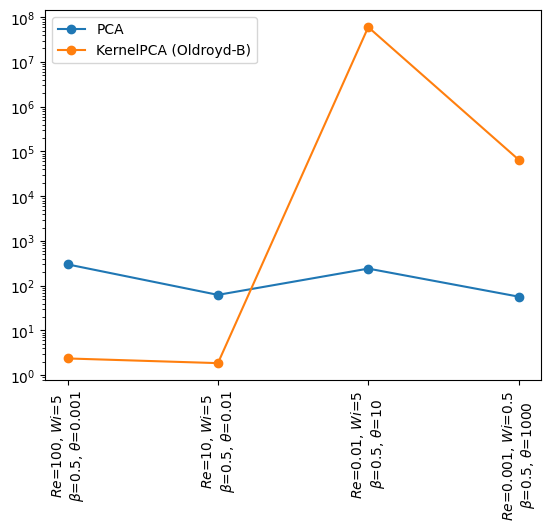

In [ ]:
plt.plot(mse_linear, 'o-', label='PCA')
plt.plot(mse_oldroyd, 'o-', label='KernelPCA (Oldroyd-B)')

plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yscale('log')
plt.legend()

In [ ]:
# Exibir espaço de busca

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [19]:
params_linear

[{'relax_coeff_nu': 0.0017485308901926384,
  'reg_weight_lam': 0.00010062278428100701,
  'max_iter': 530},
 {'relax_coeff_nu': 1.6615148095753013e-05,
  'reg_weight_lam': 0.0001646603374547386,
  'max_iter': 605},
 {'relax_coeff_nu': 0.6558592767709542,
  'reg_weight_lam': 0.9742275438859445,
  'max_iter': 1745},
 {'relax_coeff_nu': 4.786585530105162e-06,
  'reg_weight_lam': 0.003562962682930068,
  'max_iter': 28}]

In [18]:
params_oldroyd

[{'relax_coeff_nu': 0.043861199696842317,
  'reg_weight_lam': 0.0005829177658661828,
  'max_iter': 1889},
 {'relax_coeff_nu': 1.1255141039904802e-06,
  'reg_weight_lam': 0.004636542849611647,
  'max_iter': 782},
 {'relax_coeff_nu': 0.729206451468216,
  'reg_weight_lam': 0.08141013621074557,
  'max_iter': 844},
 {'relax_coeff_nu': 0.003132627231172246,
  'reg_weight_lam': 0.9978032571324688,
  'max_iter': 986}]